# 跳表（skip list）
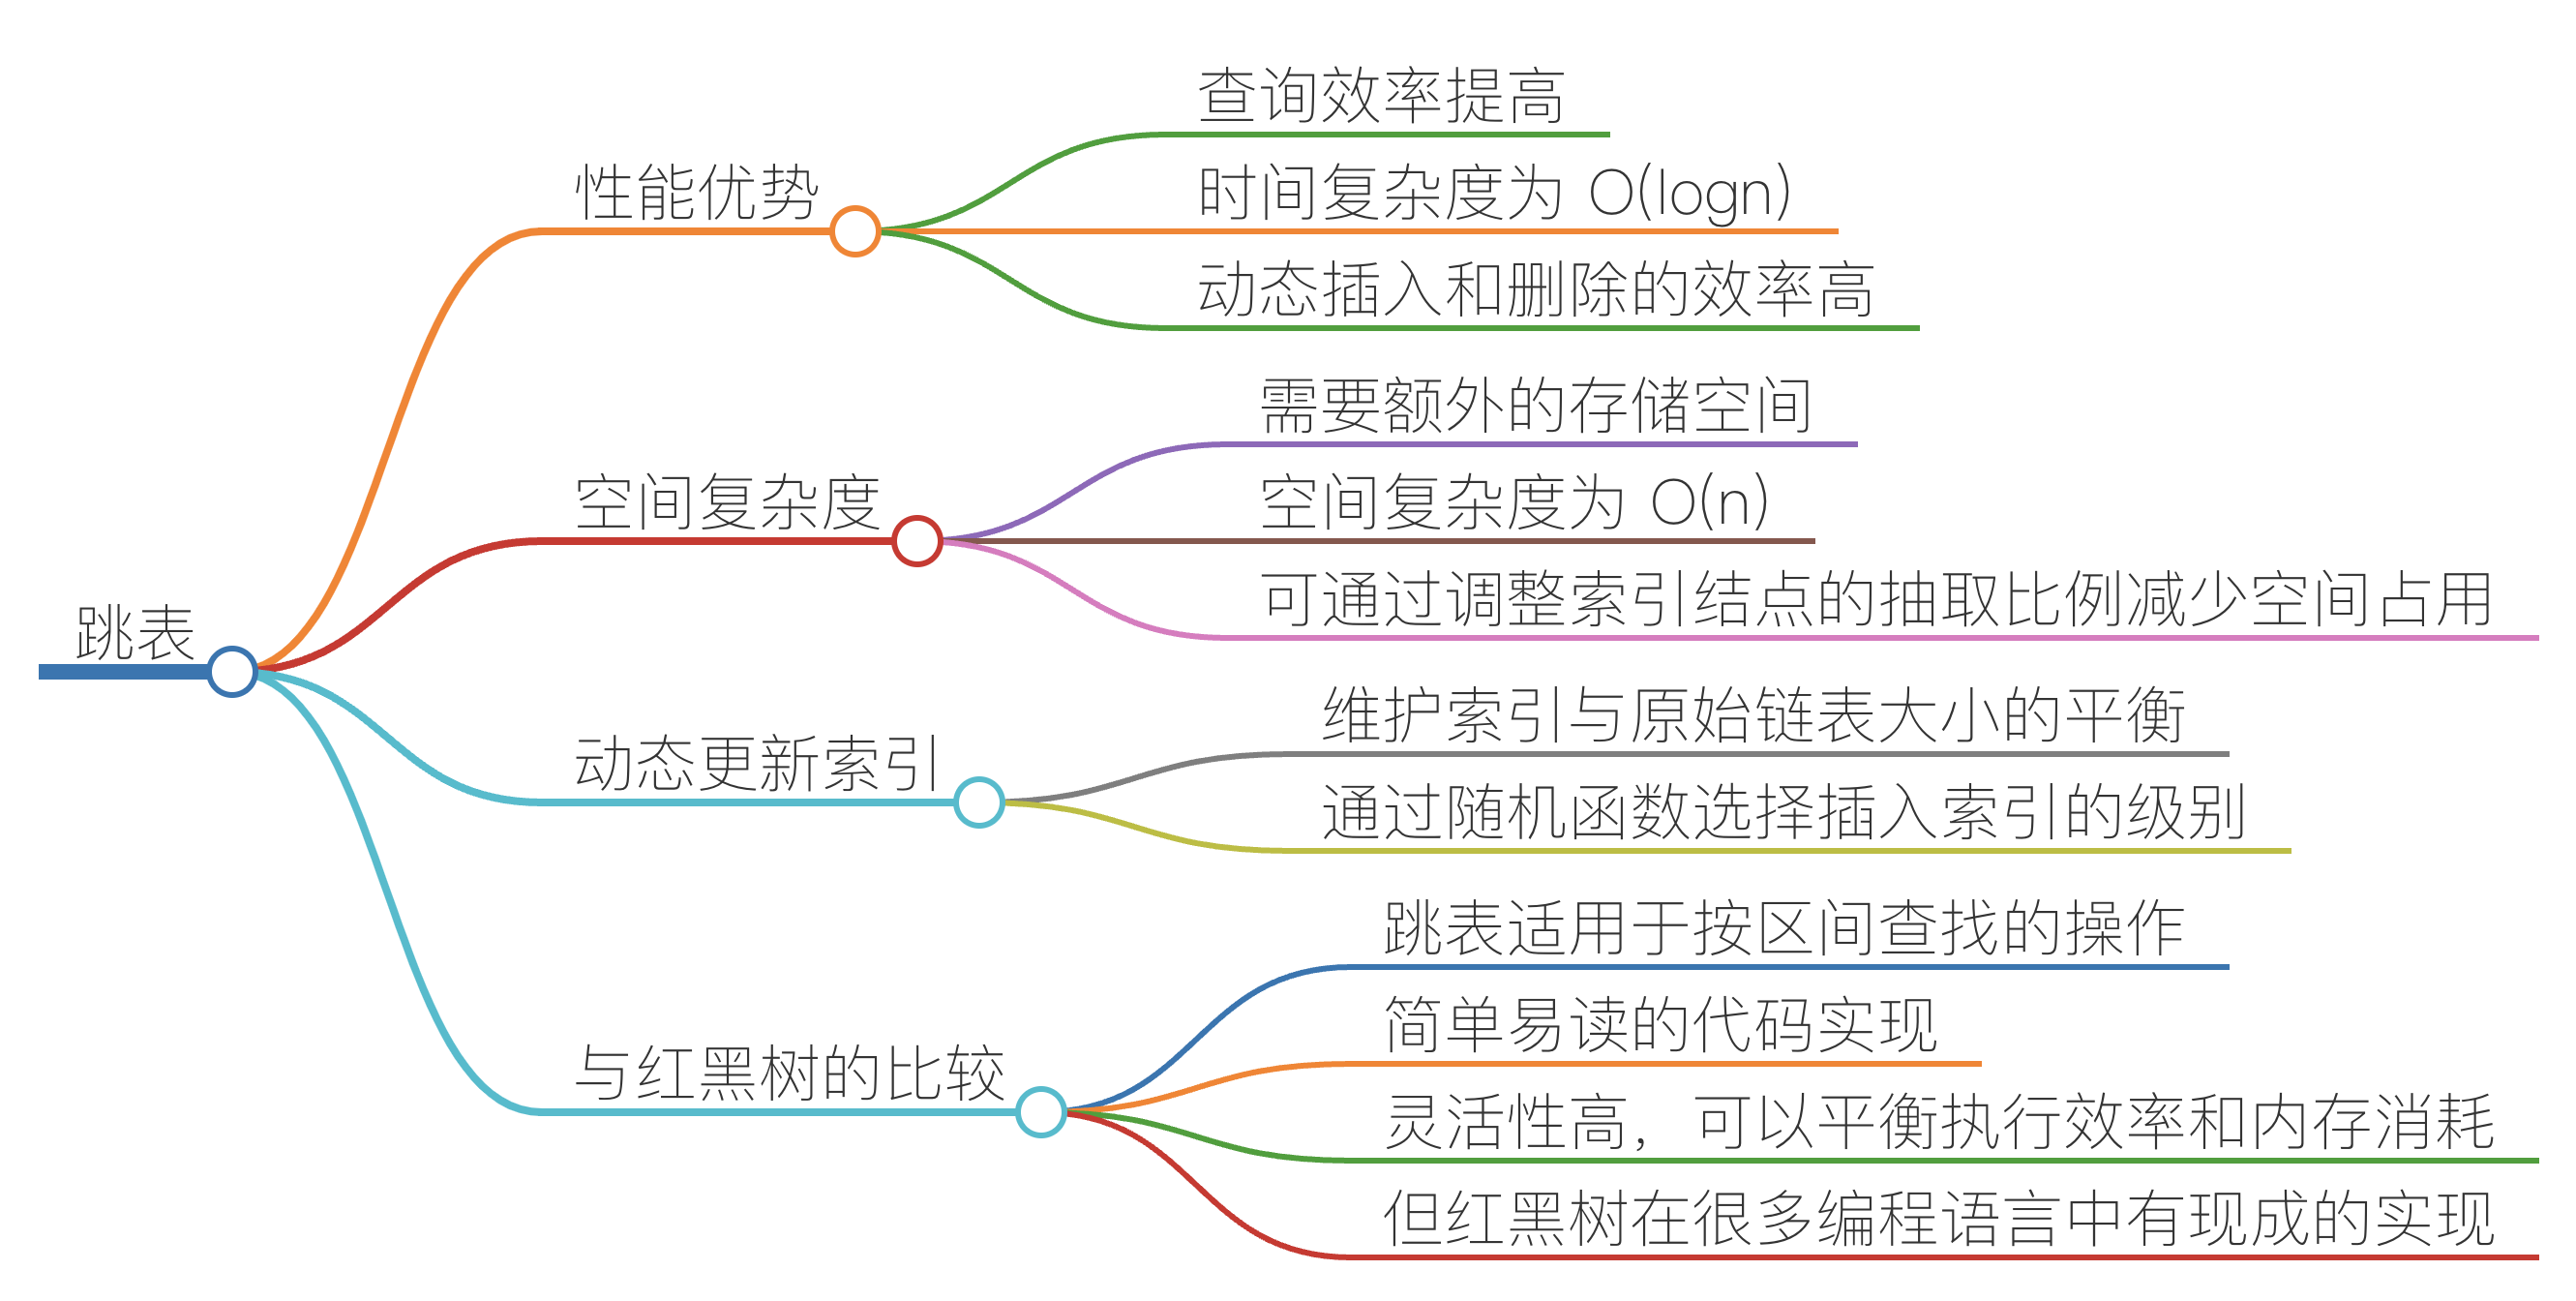

跳表是一种各方面性能都比较优秀的动态数据结构，可以支持快速地插入、删除、查找操作  
针对有序链表的查找效率低的问题，跳表通过构建多级索引的方式来提高查询效率，在有序链表上加多级索引，从而把查找效率从O(n)提高到O(logn)  
跳表的时间复杂度是O(logn)，空间复杂度是O(n)

In [5]:
import random

class ListNode:
    def __init__(self, val=None):
        self.val = val
        self.next = None  # 指向下一个节点
        self.down = None  # 指向下一层的节点

class SkipList:
    def __init__(self):
        self.head = ListNode()
        self.levels = 1  # 表示跳表层数
        self.prob = 0.5

    def flip_coin(self):
        return random.random() < self.prob

    def insert(self, val):
        node = ListNode(val)
        cur = self.head
        stack = []
        while cur:
            while cur.next and cur.next.val < val:
                cur = cur.next
            if cur.next and cur.next.val == val:
                return
            stack.append(cur)
            cur = cur.down
        down_node = None
        while stack and self.flip_coin():
            prev = stack.pop()
            new_node = ListNode(val)
            new_node.next = prev.next
            prev.next = new_node
            new_node.down = down_node
            down_node = new_node
        if down_node:
            new_head = ListNode()
            new_head.next = down_node
            new_head.down = self.head
            self.head = new_head
            self.levels += 1

    def delete(self, val):
        cur = self.head
        while cur:
            while cur.next and cur.next.val < val:
                cur = cur.next
            if cur.next and cur.next.val == val:
                cur.next = cur.next.next
            cur = cur.down

    def search(self, val):
        cur = self.head
        while cur:
            while cur.next and cur.next.val < val:
                cur = cur.next
            if cur.next and cur.next.val == val:
                return True
            cur = cur.down
        return False

In [6]:
skip_list = SkipList()
skip_list.insert(1)
skip_list.insert(2)
skip_list.insert(3)
print(skip_list.search(0))
print(skip_list.search(3))

False
True
